# Importing libraries and preparing data

In [38]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Reading data from file and checking it's shape and how it looks like.

In [39]:
data = pd.read_csv("googleplaystore.csv")
print(data.shape)
data.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Missing Data

We should check if there are any missing data.

In [40]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Let's take a look at missing data.

In [41]:
data_missing = data[data.isna().any(axis=1)]
data_missing.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up


What can be seen from it, is we can't predict or guess about missing data for all the columns, excluding Type column. 

As we can see there is no missing data in Price column.

That means, that Price value equals 0, if Type is Free, and higher then zero, when Type is Paid.

Let's find a row, with the missing Type value, to find out, what should we fill it with.

In [42]:
cols = ["Type", "Price"]
missing_type = data[data[cols].isna().any(axis=1)]
missing_type

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


As can be seen from dataframe, Price value is 0, so we should fill Type with Free.

In [43]:
data["Type"] = data["Type"].fillna("Free")

Filling the other missing data with "None", as we can't find out which value will be appropriate.

In [44]:
for col in data.columns:
    data[col] = data[col].fillna("None")

Check if it worked well.

In [45]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

It worked fine, we have dealt with all the missing data.

# Tasks

### Now, let's solve the tasks given with this dataset

## 1. Most popular category

It will be easy to find out, which category is the most popular, if we visualize our data.

First of all, let's find out how many unique categories do we have.

In [46]:
print(data.Category.unique())
print("\nAmount of unique values : ", len(data.Category.unique()))

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

Amount of unique values :  34


Now, let's count the amount of each category in our dataset.

In [47]:
amount = data.groupby("Category").count()
amount[amount.columns[:1]].head()

,App
Category,
1.9,1
ART_AND_DESIGN,65
AUTO_AND_VEHICLES,85
BEAUTY,53
BOOKS_AND_REFERENCE,231


As we can see, App column has numerical values, wich are amount of apps in each category.

That means, that we can choose any of it to visualize data! 

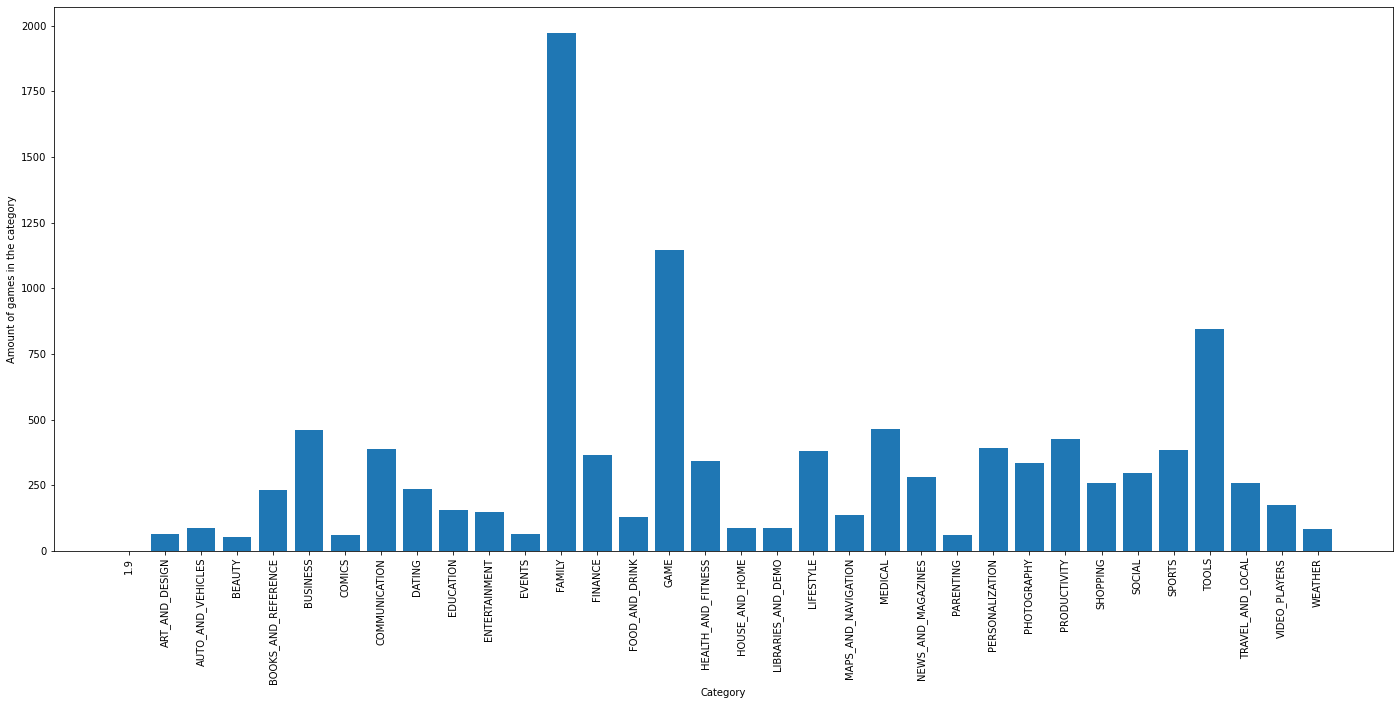

In [48]:
plt.figure(figsize=(24,10))
plt.bar(amount.index, amount["App"])
plt.ylabel("Amount of games in the category")
plt.xlabel("Category")
plt.xticks(rotation=90);

As can easily be seen from the plot, FAMILY apps is definitely the highest.

### Result 

The most popular category in this dataset is FAMILY.

## 2. App with the largest size

We should actually do the same actions, which were in the previous task.

But there is one question about the Size column format : can we only see size in megabytes or also in kilobytes?

Let's check it out!

In [49]:
temp_size = data["Size"]

In [50]:
temp_size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Looks like we have also got size in kylobytes. And some trash values.

But that's not a problem for us, because we need to fing the largest value.

As all the kylobytes values are under 1 megabyte and other trash values aren't informative, we won't even need them to find the largest.

So we will drop them!

In [51]:
cols = ["App", "Size"]
size_data = data[cols]

is_mb = []
values_transformed = []

for i in size_data.Size:
    if i[-1] == "M":
        is_mb.append(True)
        values_transformed.append(float(i[0:-1]))
    else: 
        is_mb.append(False)
        
size_data["is_megabyte"] = is_mb
size_data = size_data[size_data.is_megabyte == True]
size_data = size_data.drop(["is_megabyte"], axis=1)
size_data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M',
       '7.9M', '56M', '57M', '35M', '54M', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M', '2.9M', '38M', '32M',
       '5.4M', '18M', '1.1M', '2.2M', '4.5M', '9.8M', '52M', '9.0M',
       '6.7M', '30M', '2.6M', '7.1M', '3.7M', '22M', '7.4M', '6.4M',
       '3.2M', '8.2M', '9.9M', '4.9M', '9.5M', '5.0M', '5.9M', '13M',
       '73M', '6.8M', '3.5M', '4.0M', '2.3M', '7.2M', '2.1M', '42M',
       '7.3M', '9.1M', '55M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M',
       '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M',
       '8.8M', '6.6M', '5.1M', '61M', '66M', '8.4M', '44M', '1.6M',
       '6.2M', '53M', '1.4M', '3.0M', '5.8M', '3.8M', '9.6M', '45M',
   

Now, let's take a look at transformed values of Size.

In [52]:
values_transformed[:5]

[19.0, 14.0, 8.7, 25.0, 2.8]

Now, we will change Size column to transformed float values.

In [53]:
size_data.Size = values_transformed

Let's take a look at our datasets shape.

In [54]:
size_data.shape

(8829, 2)

As we can see, there are to many unique apps, so it won't make much sense of building bar plot, as we will have 8829 bars, and it will be almost impossible to interpret this plot.

So, we will simply sort our dataset to find out, which app has the biggest size.

In [55]:
size_data = size_data.sort_values(by="Size")
size_data

,App,Size
8077,go41cx,1.0
10043,Remote EX for NISSAN,1.0
9973,German Vocabulary Trainer,1.0
5771,News.aw,1.0
6446,BL PowerPoint Remote,1.0
...,...,...
3973,Hungry Shark Evolution,100.0
9170,Stickman Legends: Shadow Wars,100.0
5862,Miami crime simulator,100.0
1080,Post Bank,100.0


Let's get the apps with maximum installs.

In [65]:
max_inst = size_data[size_data["Size"] == size_data.Size.max()].App.to_list()

### Result

All the apps from the list below have the highest size :

In [66]:
max_inst

['Mini Golf King - Multiplayer Game',
 'Ultimate Tennis',
 'Talking Babsy Baby: Baby Games',
 'Draft Simulator for FUT 18',
 'Car Crash III Beam DH Real Damage Simulator 2018',
 'Navi Radiography Pro',
 'Hungry Shark Evolution',
 'The Walking Dead: Our World',
 'Vi Trainer',
 'Hungry Shark Evolution',
 'Gangster Town: Vice District',
 'Hungry Shark Evolution',
 'Stickman Legends: Shadow Wars',
 'Miami crime simulator',
 'Post Bank',
 'SimCity BuildIt']

## 3. App with the largest num of installs

First of all, let's take a look at unique values of Installs column

In [67]:
cols = ["App", "Installs"]
installs_data = data[cols]
installs_data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

What can be seen from the list, is that Free value might be absolutely useless in Installs column.

And, as we are going to transform data to numeric format, 0+ and 0 are the values with the same meanings for us.

That means, that we can also drop rows with 0 values as it will help us to transform data easier.

In [68]:
installs_data = installs_data[installs_data.Installs != "Free"]
installs_data = installs_data[installs_data.Installs != "0"]
installs_data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

Now we can easily transorm this data to float.

In [69]:
transformed = []

for val in installs_data.Installs:
    transformed.append(float(val[:-1].replace(",", "")))
transformed[:5]

[10000.0, 500000.0, 5000000.0, 50000000.0, 100000.0]

Everything transformed fine, let's change Installs values to transformed ones.

In [70]:
installs_data.Installs = transformed
installs_data.head()

,App,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000.0
1,Coloring book moana,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000.0
3,Sketch - Draw & Paint,50000000.0
4,Pixel Draw - Number Art Coloring Book,100000.0


Let's check the shape of this dataframe, to understand, if it makes amy sense to visualize this data.

In [71]:
installs_data.shape

(10839, 2)

As there are so many values, visualizing doesn't make any sense, so we will just sort data, to find the highest values.

In [72]:
installs_data = installs_data.sort_values("Installs")
installs_data

,App,Installs
4465,Popsicle Launcher for Android P 9.0 launcher,0.000000e+00
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0.000000e+00
5486,AP Series Solution Pro,0.000000e+00
8081,CX Network,0.000000e+00
5307,Ak Parti Yardım Toplama,0.000000e+00
...,...,...
3736,Google News,1.000000e+09
4096,Gmail,1.000000e+09
9844,Google News,1.000000e+09
341,Hangouts,1.000000e+09


As we can see, there are many apps with almost the same amount (as we didn't know the exact numbers).

Let's find all of them.

In [73]:
result = installs_data[installs_data["Installs"] == installs_data.Installs.max()]
result

,App,Installs
2544,Facebook,1.000000e+09
2611,Instagram,1.000000e+09
152,Google Play Books,1.000000e+09
3909,Instagram,1.000000e+09
3565,Google Drive,1.000000e+09
3996,Google Chrome: Fast & Secure,1.000000e+09
3896,Subway Surfers,1.000000e+09
1700,Subway Surfers,1.000000e+09
3523,Google Drive,1.000000e+09
3904,WhatsApp Messenger,1.000000e+09


As we can see, there are several duplicates.

Let's drop them.

In [74]:
result = result.drop_duplicates()

### Result

The apps from the list below have the highest amount of installs.

In [79]:
result.App.values

array(['Facebook', 'Instagram', 'Google Play Books', 'Google Drive',
       'Google Chrome: Fast & Secure', 'Subway Surfers',
       'WhatsApp Messenger', 'Google Play Games', 'Google+',
       'Google Photos', 'Messenger – Text and Video Chat for Free',
       'YouTube', 'Google', 'Maps - Navigate & Explore', 'Hangouts',
       'Skype - free IM & video calls', 'Google Play Movies & TV',
       'Google Street View', 'Gmail', 'Google News'], dtype=object)